# CREANDO VALOR DE NEGOCIO CON DATA SCIENCE

# Parte 3 - Zillow Zestimate: Exploratory Data Analysis (II)

## Imports

Realizamos los imports necesarios y cargamos los datos que estamos analizando, tal y como los dejamos la última vez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
# Cargamos cada fichero de datos
train_df = pd.read_csv("./data/train_2016_v2.csv", parse_dates=["transactiondate"])
prop_df = pd.read_csv("./data/properties_2016.csv")

c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Unimos el df de entrenamiento y el de propiedades, tomando como columna clave "parcelid", left outer join
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')

# Para calcular los coeficientes de correlación vamos a completar los valores nulos con valores medios
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values)

# Calculamos el coeficiente de correlación para cada una de esas variables
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

c:\program files\python37\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\program files\python37\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [4]:
# Seleccionamos las variables con las mayores correlaciones
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.005)]

En el *notebook* anterior de nuestro estudio vimos que había algunas características que eran de particular importancia debido a su alto coeficiente de correlación con nuestro target de salida. Vamos a imprimirlo de nuevo:

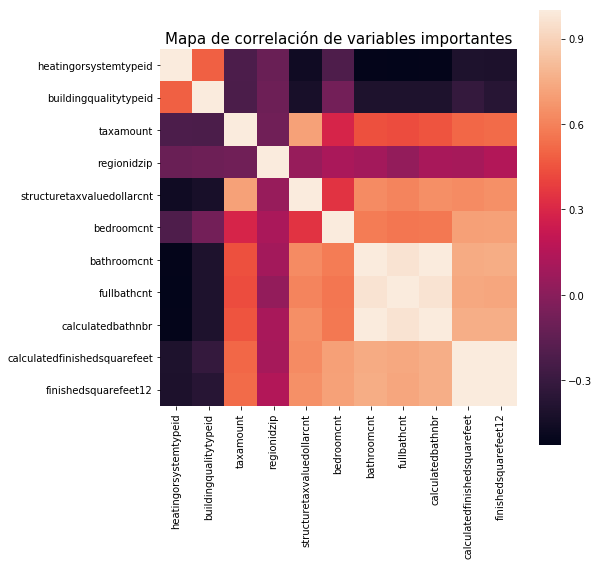

In [5]:
cols_to_use = corr_df_sel.col_labels.tolist()
temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')

# Dibujamos el mapa de calor usando seaborn
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Mapa de correlación de variables importantes", fontsize=15)
plt.show()

In [6]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.005)]
corr_df_sel

,col_labels,corr_values
21,heatingorsystemtypeid,-0.019648
6,buildingqualitytypeid,-0.007880
49,taxamount,-0.006671
35,regionidzip,-0.006498
45,structuretaxvaluedollarcnt,0.021935
4,bedroomcnt,0.025467
3,bathroomcnt,0.027889
18,fullbathcnt,0.028169
7,calculatedbathnbr,0.028758
10,calculatedfinishedsquarefeet,0.038341


Echemos un vistazo a cada uno de ellos para ver si podemos observar alguna tendencia clave

## Pies cuadrados construidos

Comencemos con los pies cuadrados de la casa, ya que tiene el coeficiente de correlación más alto. Mostraremos en un gráfico la superficie cuadrada frente al logerror y veremos si podemos encontrar algún patrón clave.

<Figure size 864x864 with 0 Axes>

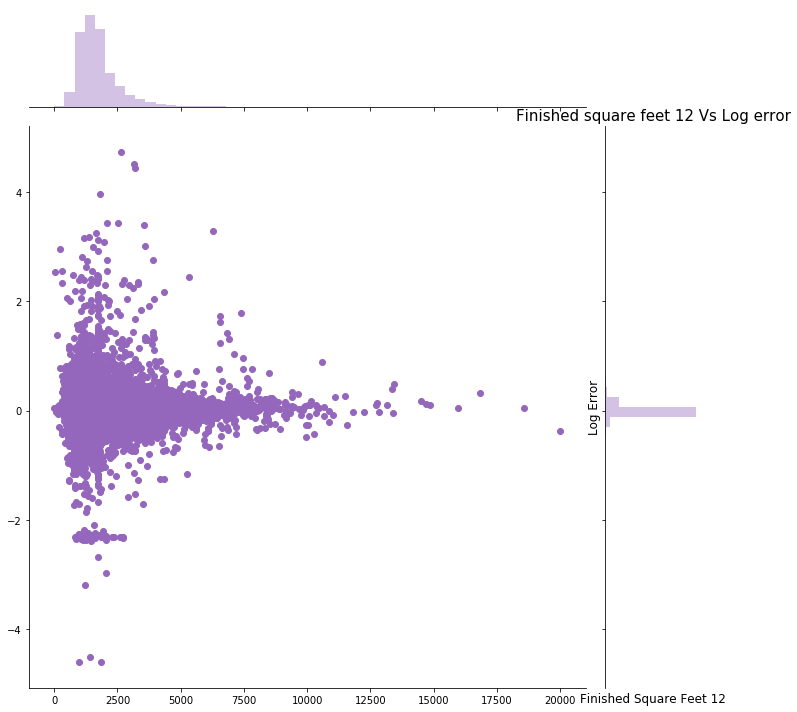

Mean of the 99.5 < percentile = 0.013658407079646016
Mean of the entire set = 0.011457219606757128


In [7]:
ccol = "calculatedfinishedsquarefeet"

ulimit = np.percentile(train_df_new[col].values, 99.5)
llimit = np.percentile(train_df_new[col].values, 0.5)

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df_new.finishedsquarefeet12.values, y=train_df_new.logerror.values, height=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

print("Mean of the 99.5 < percentile = {0}".format(np.mean(train_df_new.logerror.values[train_df_new[col]>ulimit])))
print("Mean of the entire set = {0}".format(np.mean(train_df_new.logerror.values)))

In [8]:
np.percentile(train_df[col].values, 99.5)

c:\program files\python37\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan